# Koneoppiminen: Osa 2: k-means

In [ ]:
# Kirjoita tähän tietosi!
student_name = 'Samuli Kotiranta'
student_id = 'AB8349'

## Tehtävä 1
### Aihe: Siemenaineiston esikäsittely (2 pistettä)

Tutustu aineistoon *seeds* osoitteessa https://archive.ics.uci.edu/ml/datasets/seeds .

1. Lue aineisto Pandas-kirjaston DataFrameen.

2. Muista asettaa sarakkeiden nimet aineiston dokumentaation mukaisesti. 

Vinkki: jos tabulaattorit erottimina tuottavat ongelmia, `delim_whitespace=True` auttaa. Se tekee kaikista tyhjistä merkeistä datakenttien erottimia.

In [1]:
# Kirjoita toteutuksesi tähän soluun. Tallenna vastauksesi df-muuttujaan.
import pandas as pd

#luetaan data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df = pd.read_csv(url, delim_whitespace=True, header=None)

#attribuutit
df.columns = ['area A',
              'perimeter P',
              'compactness C = 4*pi*A/P^2',
              'length of kernel',
              'width of kernel',
              'asymmetry coefficient',
              'length of kernel groove',
              'type']

# oma kommentti

Tässä nimetään sarakkeet suoraan listana.

In [2]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['area A', 'perimeter P', 'compactness C = 4*pi*A/P^2',
       'length of kernel', 'width of kernel', 'asymmetry coefficient',
       'length of kernel groove', 'type'],
      dtype='object')
First row by position: area A                        15.260
perimeter P                   14.840
compactness C = 4*pi*A/P^2     0.871
length of kernel               5.763
width of kernel                3.312
asymmetry coefficient          2.221
length of kernel groove        5.220
type                           1.000
Name: 0, dtype: float64


## Tehtävä 2
### Aihe: Visualisointi (2 pistettä)

Katsotaan näkyykö datassa ryhmittelyjä eri muuttujien suhteen.

Visualisoi aineisto käyttäen Seabornin [pairplot](https://seaborn.pydata.org/examples/scatterplot_matrix.html) -funktiota (tunnetaan myös nimellä *scatterplot matrix*).

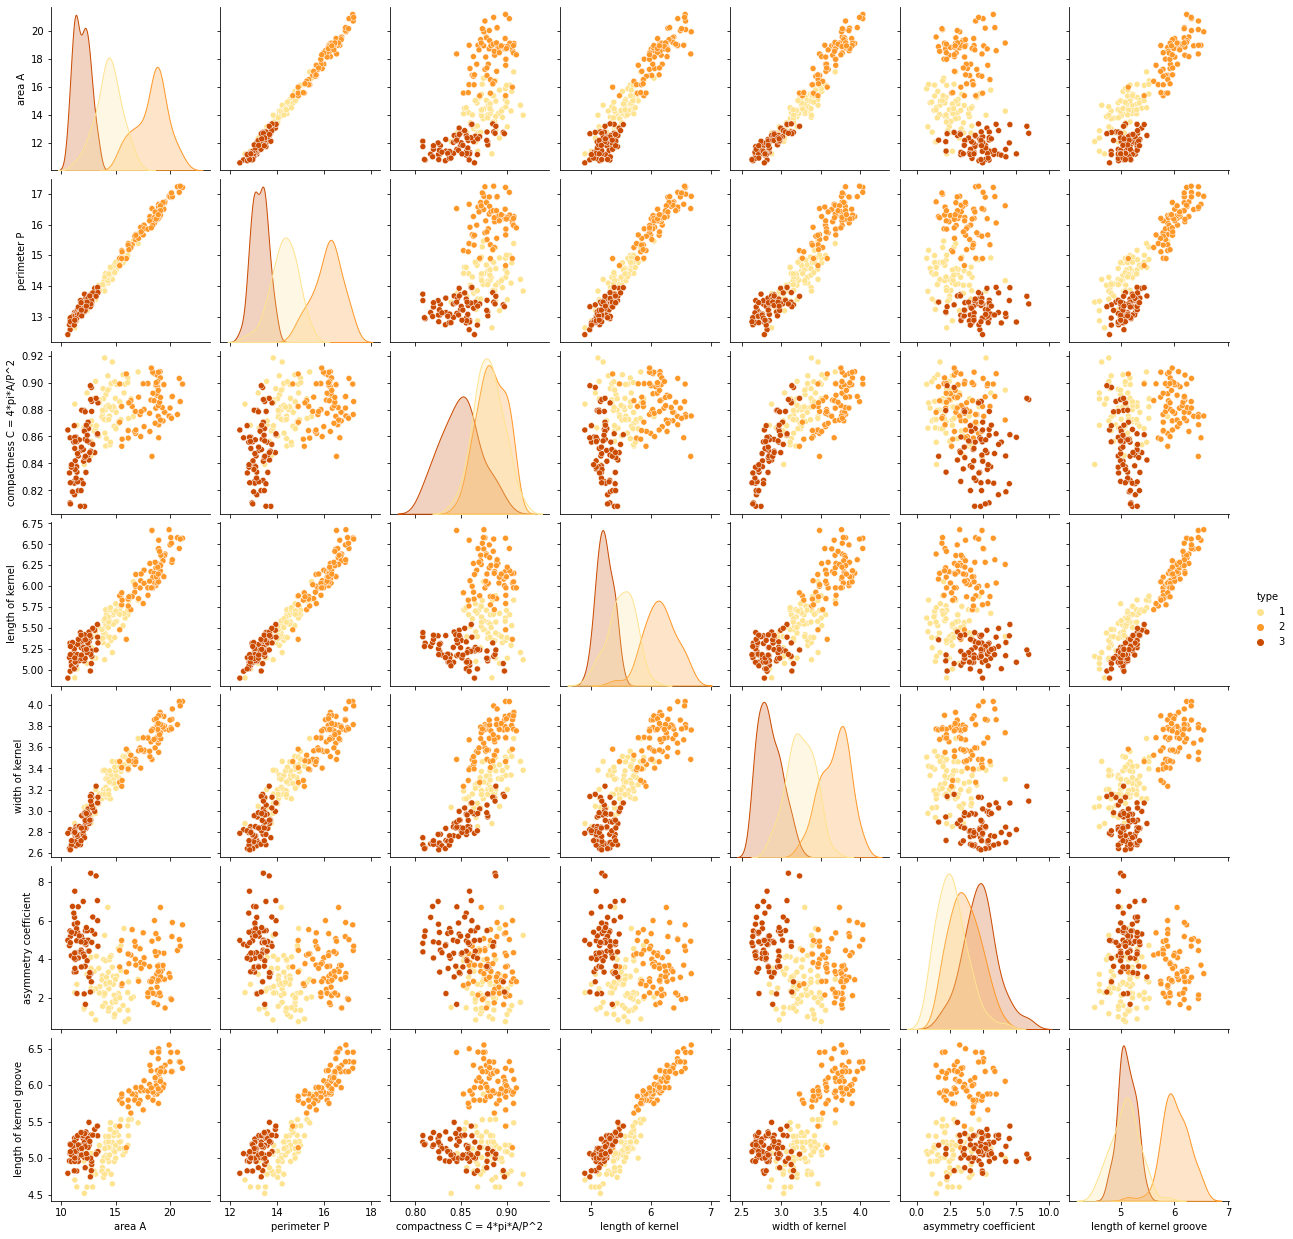

In [10]:
# Kirjoita toteutuksesi tähän soluun. 
import seaborn as sns

#datan tarkasteluun valitaan kauniin viljaisa värimaailma
#datassa on kolme eri kasvia
colors = sns.color_palette('YlOrBr', n_colors=3)
ax = sns.pairplot(df, hue='type', palette=colors)

# oma kommentti

Monet siementen geometriset ominaisuudet korreloivat voimakkaasti toistensa kanssa, kun taas esimerkiksi asymmetrisyys ei tässä aineistossa niin tee. Bayesilaisittain voisi todeta, että tämä varmastikin on juuri syy, miksi tätä datasettiä ylipäänsä opetuksessa käytetään. Empiirisen aineiston väriteemaksi valitsin viljaisan keltaiset sävyt.

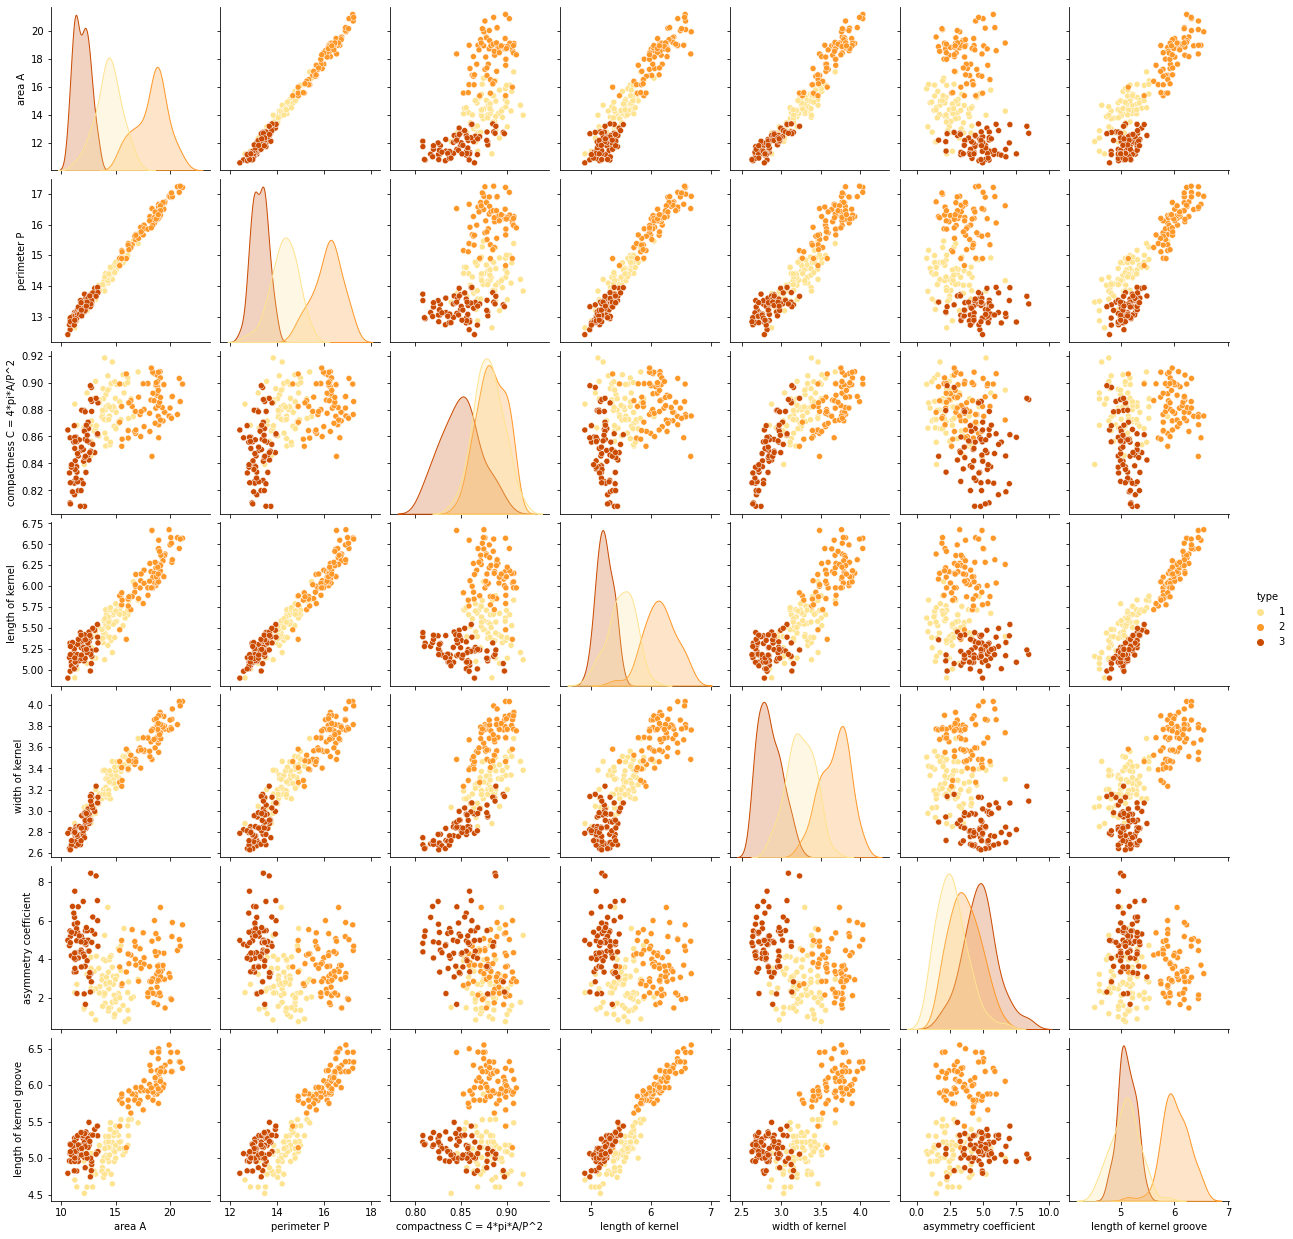

In [11]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva. 
ax.fig

## Tehtävä 3
### Aihe: k-means (6 pistettä)

1. Suorita klusterointi aineistolle käyttäen `scikit-learn`-kirjaston `cluster`-moduulin [k-means-menetelmää](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html). 

HUOM! Älä sisällytä luokkamuuttujaa klusterointiin. 

2. Visualisoi jälleen klusterit käyttäen Seabornin `pairplot` -funktiota. 

Tallenna klusteroinnin tulokset DataFramen `df` sarakkeeseen `cluster`.

Vinkki: Tiedetään, että aineistossa on mitattu kolmea erilaista kasvia. 

Vinkki: `pairplot`-funktiossa on `hue`-parametri värin asettamiseen.

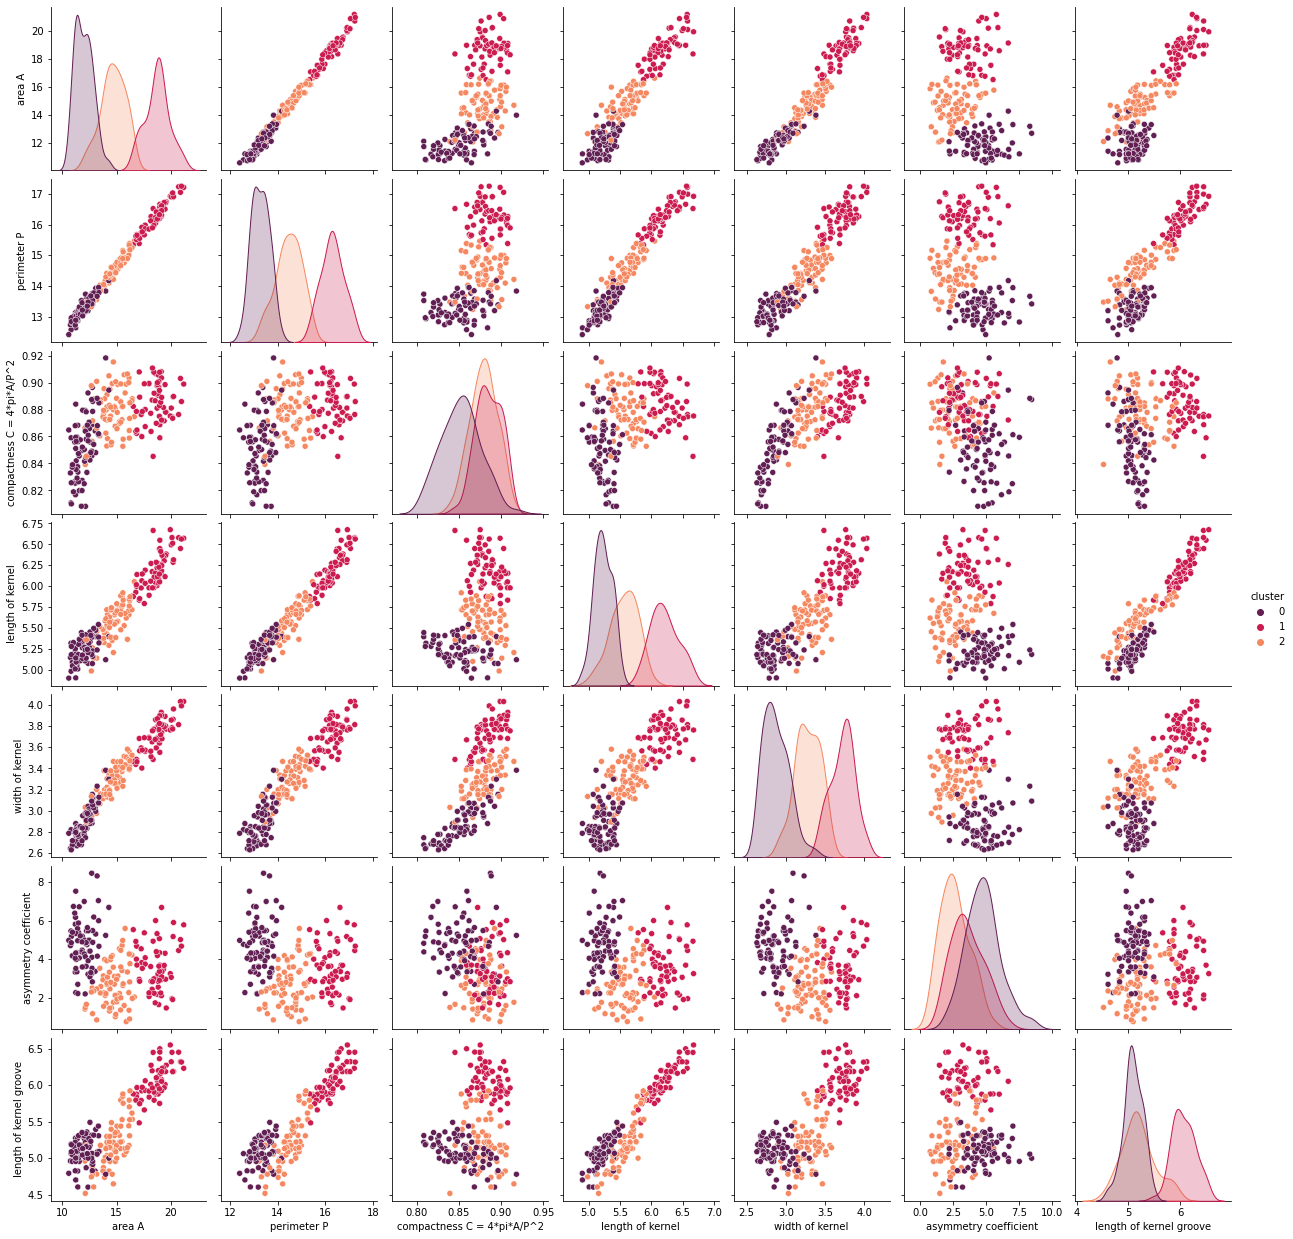

In [14]:
# Kirjoita toteutuksesi tähän soluun. Tallenna vastauksesi df-muuttujaan.
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#aluksi otetaan luokkamuuttuja irralleen
X = df.drop(columns='type')
y = df['type']

#jaetaan data treenaus ja testisetteihin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#fitataan k-means
#edelleen kasveja on kolme
kmean = KMeans(n_clusters=3)
kmean.fit(X)

#ennustetaan luokka
df['cluster'] = kmean.predict(X)

#sitten taas visualisoidaan
#otetaan modernin tekniikan ihmeeseen rakettivärit :D
colors = sns.color_palette('rocket', n_colors=3)
ax = sns.pairplot(X, hue='cluster', palette=colors)

#tuleeko mukaan cluster_centers_ ?

# oma kommentti

Toisin kuin edellisen osan kNN-tehtävässä, tässä k:n arvon valinta määräytyy luonnollisesti tiedosta, että siemenet edustavat kolmea kasvilajia. Menetelmä osaa hienosti jakaa aineiston kolmeen luokkaan, jotka ainakin silmämääräisesti sopisivat yhteen ylempänä suoraan datasta saadun luokittelun kanssa. Klusterointikeskuksia en lopulta sisällyttänyt grafiikkaan, kun sitä ei kerran tarvinnutkaan tehdä.

Clusters: 0      1
1      1
2      1
3      1
4      1
      ..
205    0
206    0
207    0
208    0
209    0
Name: cluster, Length: 210, dtype: int32


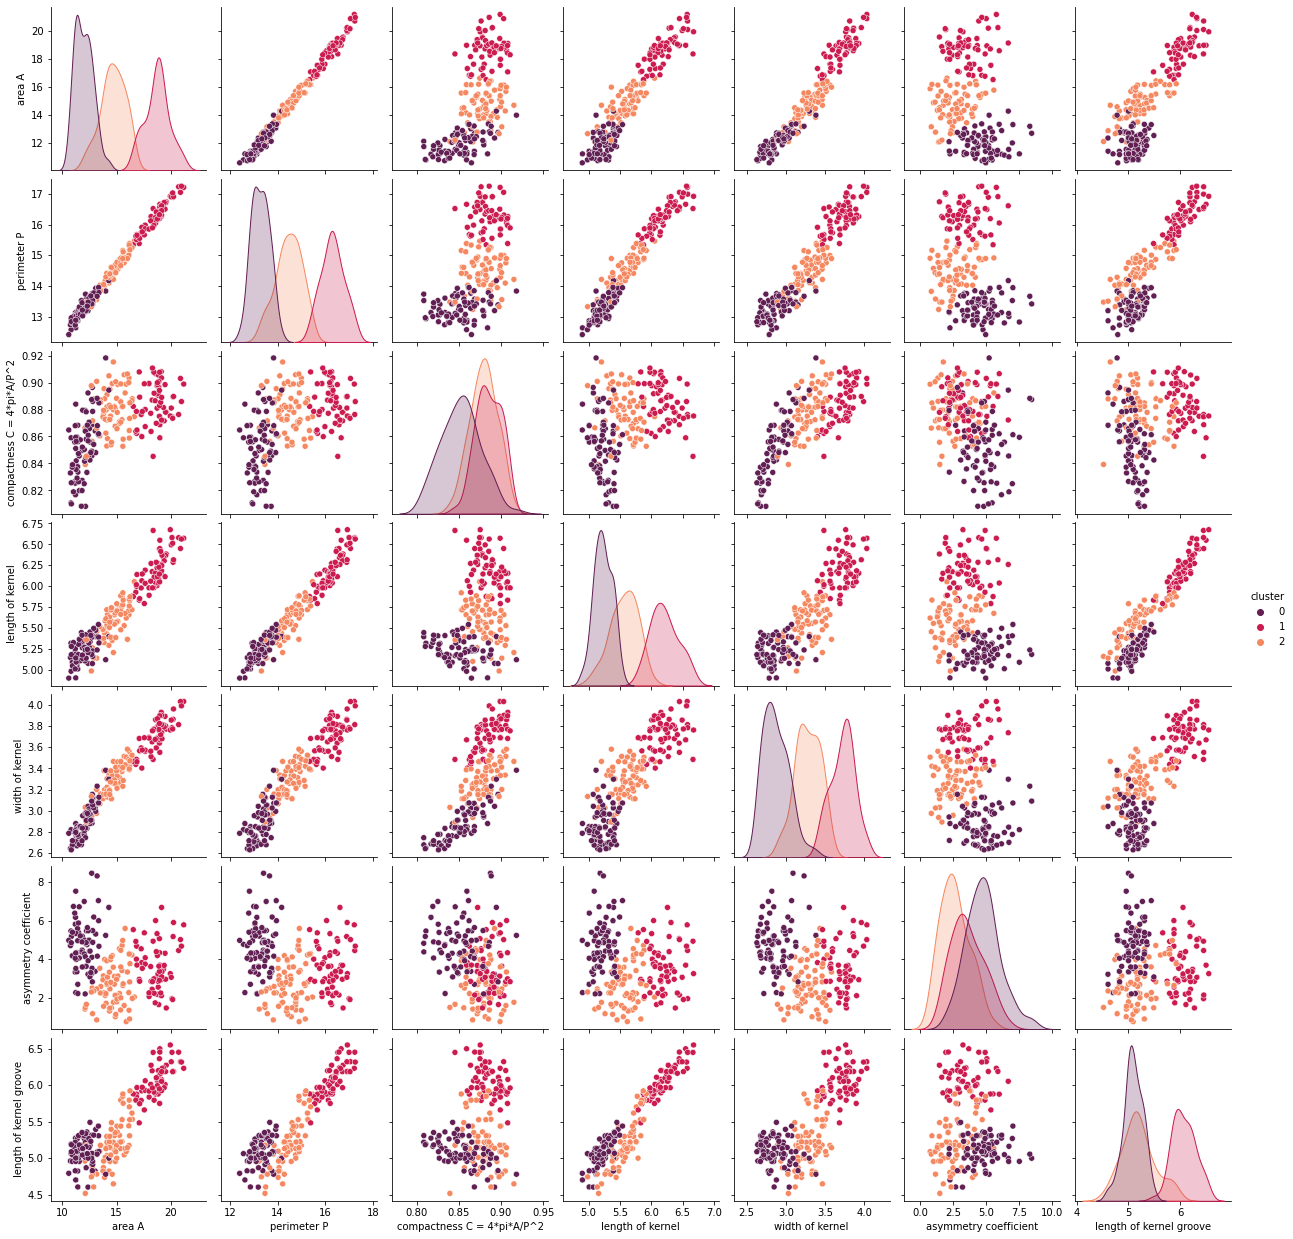

In [15]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva.
print(f'Clusters: {df["cluster"]}')
ax.fig